In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

DATA_FOLDER = 'data'
SAMPLED_DATA_FOLDER = 'data/sampled_coe_dfs'
BEST_DENSITIES_FULL_DF_PATH = 'data/best_densities_full.csv'

# BI SENSITIVITY

In [82]:
from typing import Dict, List


def get_subdirectories(path):
    return [f.path for f in os.scandir(path) if f.is_dir()]

def get_result_dfs(dir: str, bi_level: int) -> List[pd.DataFrame]:
    results = []
    for submethod_dir in get_subdirectories(dir):
        result_df = pd.read_csv(
            os.path.join(submethod_dir, f'results_BI{bi_level}.tsv'), sep='\t'
        )

        result_df.dropna(inplace=True)

        result_df['submethod'] = result_df['method_time_prediction'].apply(
            lambda x: x.split('_')[1] if '_' in x else None
        )
        result_df['method'] = result_df['method_time_prediction'].apply(
            lambda x: x.split('_')[0]
        )

        results.append(result_df)
    return results

def get_best_densities_df(path: str) -> pd.DataFrame:
    best_densities = pd.read_csv(path)
    return best_densities

def get_results_df_for_best_densities(
    results_df: pd.DataFrame, best_densities_df: pd.DataFrame
) -> pd.DataFrame:
    return results_df[
        (results_df['timestamp'].isin(best_densities_df['timestamp']))
        & (results_df['timestamp_density'].isin(best_densities_df['timestamp_density']))
    ].copy()

def get_column_mean_for_submethods(
    results_df: pd.DataFrame, method:str, column: str
) -> pd.DataFrame:
    df = results_df[results_df['method'] == method]
    return df.groupby('submethod')[column].mean().sort_values().reset_index()

def get_column_mean_for_best_submethods(
    results_df: pd.DataFrame, method_best_submethod_map: Dict[str, str], column: str
) -> pd.DataFrame:
    df = results_df[
        (results_df['method'].isin(['oracle', 'naive']))
        | (
            (results_df['method'].isin(method_best_submethod_map.keys()))
            & (results_df['submethod'].isin(method_best_submethod_map.values()))
            
        )
    ]
    return df.groupby('method')[column].mean().sort_values().reset_index()

In [91]:
results_dfs = list()
for bi_level in [5,10,15]:
    current_bi_results_dfs = get_result_dfs(SAMPLED_DATA_FOLDER, bi_level)
    best_densities_df = get_best_densities_df(BEST_DENSITIES_FULL_DF_PATH)
    current_bi_results_dfs = [
        get_results_df_for_best_densities(results_df, best_densities_df)
        for results_df in current_bi_results_dfs
    ]
    results_df = pd.concat(current_bi_results_dfs)
    results_dfs.append(results_df)

results_df = pd.concat(results_dfs)
oracle_results_df = results_df[results_df['method'] == 'oracle']
results_df.head()

,timestamp,timestamp_density,method_time_prediction,bi_level,accuracy,returns,submethod,method
0,1.705074e+12,1.705073e+09,naive,5,0.603960,14.905018,None,naive
2,1.705165e+12,1.705164e+09,naive,5,0.535354,-6.658408,None,naive
3,1.705168e+12,1.705168e+09,naive,5,0.611765,21.449871,None,naive
4,1.705181e+12,1.705181e+09,naive,5,0.409091,-3.961942,None,naive
5,1.705262e+12,1.705261e+09,naive,5,0.554217,3.274566,None,naive


In [95]:
oracle_results_means_df = oracle_results_df[
    ['bi_level', 'accuracy', 'returns']
].groupby(['bi_level']).mean().sort_values('accuracy', ascending=False).reset_index()
oracle_results_means_df

,bi_level,accuracy,returns
0,15,0.550031,8.407914
1,5,0.545172,7.255611
2,10,0.522560,2.423431


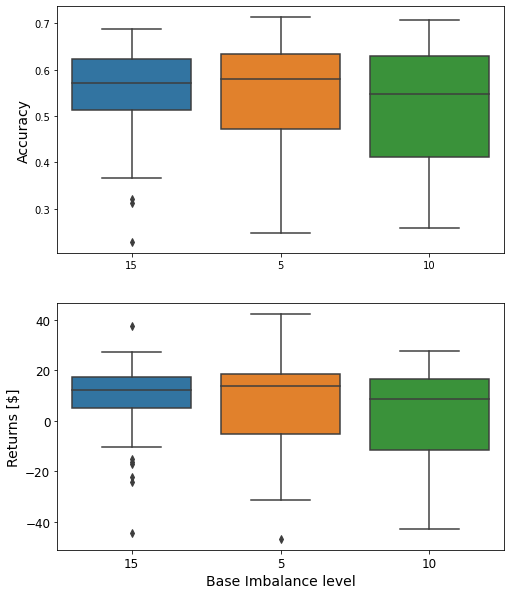

In [104]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.boxplot(data=oracle_results_df, x='bi_level', y='accuracy', order=oracle_results_means_df['bi_level'], ax=ax1)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_xlabel('')
# Create the second box plot under the first one
sns.boxplot(data=oracle_results_df, x='bi_level', y='returns', ax=ax2, order=oracle_results_means_df['bi_level'])
ax2.set_ylabel('Returns [$]', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Base Imbalance level', fontsize=14)
plt.show()
# increase tick label size



# ACCURACY RESULTS

In [160]:
from typing import Dict, List


def get_subdirectories(path):
    return [f.path for f in os.scandir(path) if f.is_dir()]

def get_result_dfs(dir: str, bi_level: int) -> List[pd.DataFrame]:
    results = []
    for submethod_dir in get_subdirectories(dir):
        result_df = pd.read_csv(
            os.path.join(submethod_dir, f'results_BI{bi_level}.tsv'), sep='\t'
        )

        result_df.dropna(inplace=True)

        result_df['submethod'] = result_df['method_time_prediction'].apply(
            lambda x: x.split('_')[1] if '_' in x else None
        )
        result_df['method'] = result_df['method_time_prediction'].apply(
            lambda x: x.split('_')[0]
        )

        results.append(result_df)
    return results

def get_best_densities_df(path: str) -> pd.DataFrame:
    best_densities = pd.read_csv(path)
    return best_densities

def get_results_df_for_best_densities(
    results_df: pd.DataFrame, best_densities_df: pd.DataFrame
) -> pd.DataFrame:
    return results_df[
        (results_df['timestamp'].isin(best_densities_df['timestamp']))
        & (results_df['timestamp_density'].isin(best_densities_df['timestamp_density']))
    ].copy()

def get_column_mean_for_submethods(
    results_df: pd.DataFrame, method:str, column: str
) -> pd.DataFrame:
    df = results_df[results_df['method'] == method]
    return df.groupby('submethod')[column].mean().sort_values().reset_index()

def get_column_mean_for_best_submethods(
    results_df: pd.DataFrame, method_best_submethod_map: Dict[str, str], column: str
) -> pd.DataFrame:
    df = results_df[
        (results_df['method'].isin(['oracle', 'naive']))
        | (
            (results_df['method'].isin(method_best_submethod_map.keys()))
            & (results_df['submethod'].isin(method_best_submethod_map.values()))
            
        )
    ]
    return df.groupby('method_time_prediction')[column].mean().sort_values().reset_index()

In [161]:
current_bi_results_dfs = get_result_dfs(SAMPLED_DATA_FOLDER, bi_level)
best_densities_df = get_best_densities_df(BEST_DENSITIES_FULL_DF_PATH)
current_bi_results_dfs = [
    get_results_df_for_best_densities(results_df, best_densities_df)
    for results_df in current_bi_results_dfs
]
results_df = pd.concat(current_bi_results_dfs)
results_df.head()

,timestamp,timestamp_density,method_time_prediction,bi_level,accuracy,returns,submethod,method
0,1.705074e+12,1.705073e+09,naive,15,0.524752,3.444685,None,naive
1,1.705077e+12,1.705076e+09,naive,15,0.545455,25.150761,None,naive
2,1.705165e+12,1.705164e+09,naive,15,0.544554,-3.254885,None,naive
3,1.705168e+12,1.705168e+09,naive,15,0.635294,16.788246,None,naive
4,1.705181e+12,1.705181e+09,naive,15,0.352273,-1.280893,None,naive


In [154]:
results_df[['timestamp', 'timestamp_density', 'method_time_prediction']].groupby(
    ['timestamp', 'timestamp_density']
).count().sort_values('method_time_prediction').head(10)

method_time_prediction
timestamp    timestamp_density                        
1.705074e+12 1.705073e+09                           11
1.705930e+12 1.705929e+09                           11
1.705960e+12 1.705955e+09                           11
             1.705958e+09                           11
             1.705960e+09                           11
1.706027e+12 1.706025e+09                           11
1.706035e+12 1.706031e+09                           11
1.706042e+12 1.706039e+09                           11
             1.706041e+09                           11
1.706050e+12 1.706044e+09                           11

In [124]:
get_column_mean_for_submethods(results_df, 'hawkes', 'accuracy').sort_values('accuracy', ascending=False)

,submethod,accuracy
3,10,0.518188
2,15,0.517154
1,5,0.511301
0,20,0.507528


In [125]:
get_column_mean_for_submethods(results_df, 'movingaverage', 'accuracy').sort_values('accuracy', ascending=False)

,submethod,accuracy
4,180,0.515414
3,240,0.510429
2,30,0.509844
1,60,0.507646
0,120,0.507337


In [128]:
accuracy_mean_df = get_column_mean_for_best_submethods(
    results_df,
    {'hawkes': '10', 'movingaverage': '180'},
    'accuracy'
).sort_values('accuracy', ascending=False)
accuracy_mean_df

,method_time_prediction,accuracy
3,oracle,0.550031
2,hawkes_10,0.518188
1,movingaverage_180,0.515414
0,naive,0.507636


In [129]:
returns_mean_df = get_column_mean_for_best_submethods(
    results_df,
    {'hawkes': '10', 'movingaverage': '180'},
    'returns'
).sort_values('returns', ascending=False)
returns_mean_df

,method_time_prediction,returns
3,oracle,8.407914
2,hawkes_10,2.359063
1,movingaverage_180,1.519339
0,naive,1.209154


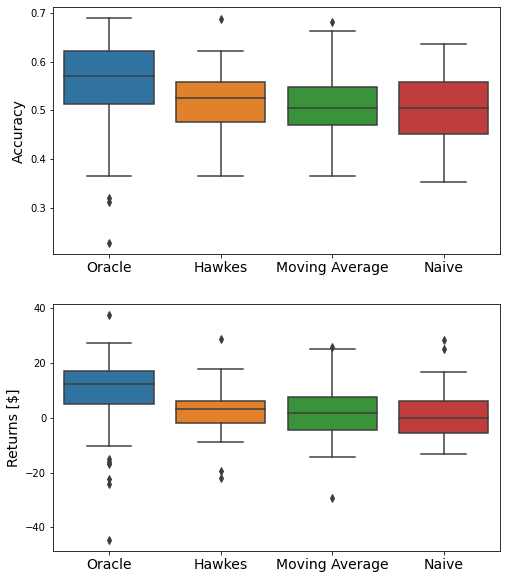

In [143]:
final_result_df = results_df[
    results_df['method_time_prediction'].isin(
        ['oracle', 'naive', 'hawkes_10', 'movingaverage_180']
    )
].copy()

x_axis_map = {
    'oracle': 'Oracle',
    'naive': 'Naive',
    'hawkes_10': 'Hawkes',
    'movingaverage_180': 'Moving Average',
}


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))


sns.boxplot(
    data=final_result_df,
    x='method_time_prediction',
    y='accuracy',
    order=accuracy_mean_df['method_time_prediction'],
    ax=ax1,
)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_xlabel('')

# increase tick label size for ax1
plt.xticks(fontsize=12)

sns.boxplot(
    data=final_result_df,
    x='method_time_prediction',
    y='returns',
    order=accuracy_mean_df['method_time_prediction'],
    ax=ax2,
)
ax2.set_ylabel('Returns [$]', fontsize=14)
ax2.set_xlabel('')

# rename x axis labels
ax1.set_xticklabels(
    [x_axis_map[x] for x in accuracy_mean_df['method_time_prediction']],
)
ax2.set_xticklabels(
    [x_axis_map[x] for x in accuracy_mean_df['method_time_prediction']],
)

for ax in (ax1, ax2):
    ax.tick_params(axis='x', labelsize=14)

# TIME ANALYSIS

In [144]:
from typing import List

def get_best_densities_df(path: str) -> pd.DataFrame:
    best_densities = pd.read_csv(path)
    return best_densities

def is_filename_in_best_densities(filename: str, best_densities_df: pd.DataFrame) -> bool:
    timestamp, timestamp_density = filename.split('_')[0:2]

    return best_densities_df[
        (best_densities_df['timestamp'] == int(timestamp))
        & (best_densities_df['timestamp_density'] == int(timestamp_density))
    ].shape[0] > 0

def get_readed_coe_df(path: str, submethod:str, bi_level: int) -> pd.DataFrame:
    df = pd.read_csv(path, header=0)
    df['Submethod'] = submethod
    df['Method'] = df['Submethod'].apply(lambda x: x.split('_')[0])
    df['SubmethodParam'] = df['Submethod'].apply(lambda x: x.split('_')[1] if '_' in x else None)
    df['BiLevel'] = bi_level

    return df

def get_coe_df_for_submethod(
    data_path: str, submethod_dir: str, bi_level: int, prefixes: List[str]
) -> pd.DataFrame:
    coe_df = pd.concat(
        [
            get_readed_coe_df(
                os.path.join(data_path, submethod_dir, filename), submethod_dir, bi_level
            )
            for filename in os.listdir(os.path.join(data_path, submethod_dir))
            if is_filename_to_compute(filename, prefixes, bi_level)
        ]
    )

    return coe_df

def is_filename_to_compute(filename: str, prefixes: List[str], bi_level: int) -> bool:
    if not filename.endswith(f'_BI{bi_level}.csv'):
        return False
    
    if len(prefixes) == 0:
        return True
    
    return any([filename.startswith(prefix) for prefix in prefixes])

def get_coe_df_for_all_submethods(data_path: str, bi_level: int, prefixes: List[str]) -> pd.DataFrame:
    coe_df = pd.concat(
        [
            get_coe_df_for_submethod(data_path, submethod_dir, bi_level, prefixes)
            for submethod_dir in get_subdirectories(data_path)
        ]
    )

    return coe_df

def get_coe_df_with_metrics(coe_df: pd.DataFrame) -> pd.DataFrame:
    coe_df['ErrorPrediction'] = (coe_df['Timestamp'] - coe_df['RealNextEventTimestampNotScaled']).abs()
    coe_df['IsNextTimestampNearPrediction'] = coe_df['NearestEventTimestampNotScaled'] == coe_df['RealNextEventTimestampNotScaled']

    return coe_df

def get_subdirectories(path):
    return [f.name for f in os.scandir(path) if f.is_dir()]

In [145]:
best_densities_df = get_best_densities_df(BEST_DENSITIES_FULL_DF_PATH)

prefixes = (
    best_densities_df['timestamp'].astype(str) + '_' 
    + best_densities_df['timestamp_density'].astype(str)
).tolist()

coe_df = get_coe_df_for_all_submethods(SAMPLED_DATA_FOLDER, 15, prefixes)
coe_df.dropna(subset=[
    'LastEventTimestampNotScaled',
    'NearestEventTimestampNotScaled',
    'RealNextEventTimestampNotScaled'
], inplace=True)
coe_df = get_coe_df_with_metrics(coe_df)
coe_df.head()

,Timestamp,BaseImbalance,Return,LastEventTimestampNotScaled,NearestEventTimestampNotScaled,RealNextEventTimestampNotScaled,Submethod,Method,SubmethodParam,BiLevel,ErrorPrediction,IsNextTimestampNearPrediction
661,1800.0,0.128205,-0.000070,1790.576,1799.531,1799.531,naive,naive,None,15,0.469,True
662,1804.0,0.121951,-0.000023,1799.531,1803.883,1803.883,naive,naive,None,15,0.117,True
663,1806.0,0.162791,0.000058,1803.883,1807.128,1807.128,naive,naive,None,15,1.128,True
664,1808.0,0.162791,0.000047,1803.883,1808.060,1807.128,naive,naive,None,15,0.872,False
665,1809.0,0.085714,-0.000023,1807.830,1809.012,1808.060,naive,naive,None,15,0.940,False


In [146]:
mean_error_prediction_coe_df = coe_df[['Submethod', 'ErrorPrediction']].groupby('Submethod').mean().sort_values('ErrorPrediction')
mean_error_prediction_index = mean_error_prediction_coe_df.index.to_list()
mean_error_prediction_coe_df

,ErrorPrediction
Submethod,
oracle,0.000000
movingaverage_30,0.655460
movingaverage_60,0.671874
movingaverage_120,0.713147
movingaverage_180,0.742930
movingaverage_240,0.752624
hawkes_20,0.778344
hawkes_15,0.795292
hawkes_10,0.834052


([<matplotlib.axis.XTick at 0x7f8822c72a00>,
 [Text(0, 0, 'oracle'),
  Text(1, 0, 'm30'),
  Text(2, 0, 'm60'),
  Text(3, 0, 'm120'),
  Text(4, 0, 'm180'),
  Text(5, 0, 'm240'),
  Text(6, 0, 'h20'),
  Text(7, 0, 'h15'),
  Text(8, 0, 'h10'),
  Text(9, 0, 'h5'),
  Text(10, 0, 'naive')])

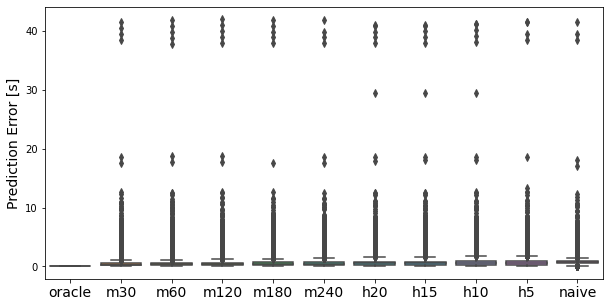

In [147]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=coe_df, x='Submethod', y='ErrorPrediction', order=mean_error_prediction_index)
plt.ylabel('Prediction Error [s]', fontsize=14)
plt.xlabel('')

# map x tick labels to submethod names
remane = lambda x: x if '_' not in x else x.split('_')[0][0] + x.split('_')[1]
plt.xticks(range(len(mean_error_prediction_index)), [remane(x) for x in mean_error_prediction_index], fontsize=14)


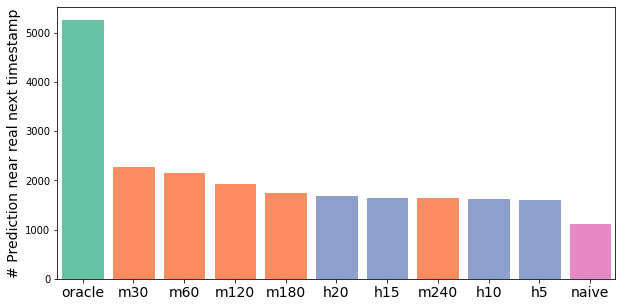

In [148]:
sum_right_predictions_coe_df = coe_df[
    ['Method', 'Submethod', 'IsNextTimestampNearPrediction']
].groupby(['Method', 'Submethod']).sum().sort_values(
    'IsNextTimestampNearPrediction', ascending=False
).reset_index()

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=sum_right_predictions_coe_df,
    x='Submethod',
    y='IsNextTimestampNearPrediction',
    order=sum_right_predictions_coe_df['Submethod'],
)
plt.ylabel('# Prediction near real next timestamp', fontsize=14)
plt.xlabel('')

# map x tick labels to submethod names
remane = lambda x: x if '_' not in x else x.split('_')[0][0] + x.split('_')[1]
plt.xticks(range(len(mean_error_prediction_index)), [remane(x) for x in sum_right_predictions_coe_df['Submethod']], fontsize=14)

methods = list(sum_right_predictions_coe_df['Method'].unique())

# Define colors for each method
method_colors = sns.color_palette("Set2", len(methods))

# Iterate over bars and set color based on method
for i, bar in enumerate(ax.patches):
    method_index = methods.index(sum_right_predictions_coe_df.iloc[i]['Method'])
    bar.set_color(method_colors[method_index])

plt.show()

# LINEAR REGRESSION MSE

In [12]:
df = pd.read_csv('data/mses.tsv', sep='\t')
df.head()

,submethod,mse
0,naive,4.476125e-09
1,naive,6.475387e-09
2,naive,2.163275e-09
3,naive,3.572811e-09
4,naive,3.335145e-09


In [13]:
df.groupby('submethod')['mse'].mean().sort_values().reset_index()

,submethod,mse
0,hawkes_10,3.605931e-09
1,movingaverage_240,3.607711e-09
2,movingaverage_30,3.614347e-09
3,hawkes_20,3.619902e-09
4,hawkes_15,3.620307e-09
5,naive,3.620583e-09
6,movingaverage_180,3.621702e-09
7,hawkes_5,3.633752e-09
8,movingaverage_120,3.635682e-09
9,movingaverage_60,3.640233e-09


In [22]:
list(df['submethod'].unique())

['naive',
 'oracle',
 'movingaverage_180',
 'movingaverage_120',
 'hawkes_20',
 'hawkes_5',
 'movingaverage_60',
 'hawkes_15',
 'hawkes_10',
 'movingaverage_30',
 'movingaverage_240']

([<matplotlib.axis.XTick at 0x7fe7b2b16fa0>,
 [Text(0, 0, 'naive'),
  Text(1, 0, 'oracle'),
  Text(2, 0, 'm180'),
  Text(3, 0, 'm120'),
  Text(4, 0, 'h20'),
  Text(5, 0, 'h5'),
  Text(6, 0, 'm60'),
  Text(7, 0, 'h15'),
  Text(8, 0, 'h10'),
  Text(9, 0, 'm30'),
  Text(10, 0, 'm240')])

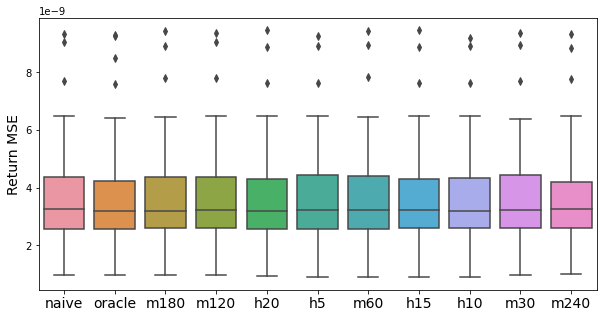

In [23]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=df, x='submethod', y='mse')
plt.ylabel('Return MSE', fontsize=14)
plt.xlabel('')

x_order = list(df['submethod'].unique())
# map x tick labels to submethod names
remane = lambda x: x if '_' not in x else x.split('_')[0][0] + x.split('_')[1]
plt.xticks(range(len(x_order)), [remane(x) for x in x_order], fontsize=14)

